In [9]:
import pandas as pd
df = pd.read_csv("Ex__Data/ex_data.csv").set_index("date")

In [10]:
df.corr()[['temp']].sort_values('temp')

,temp
pressure_1,-0.838060
pressure_2,-0.818552
pressure_3,-0.804183
humidity_1,-0.247963
humidity_2,-0.233463
humidity_3,-0.226900
feels_like_3,0.885791
feels_like_2,0.902816
feels_like_1,0.923727
temp_3,0.931921


In [11]:
predictors = ['temp_1',  'temp_2',  'temp_3', 
              'temp_min_1',   'temp_min_2',   'temp_min_3',
              'feels_like_1', 'feels_like_2', 'feels_like_3',
              'humidity_1', 'humidity_2', 'humidity_3',
              'pressure_1', 'pressure_2', 'pressure_3',
              'temp_max_1',   'temp_max_2',   'temp_max_3']
df2 = df[['temp'] + predictors]

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

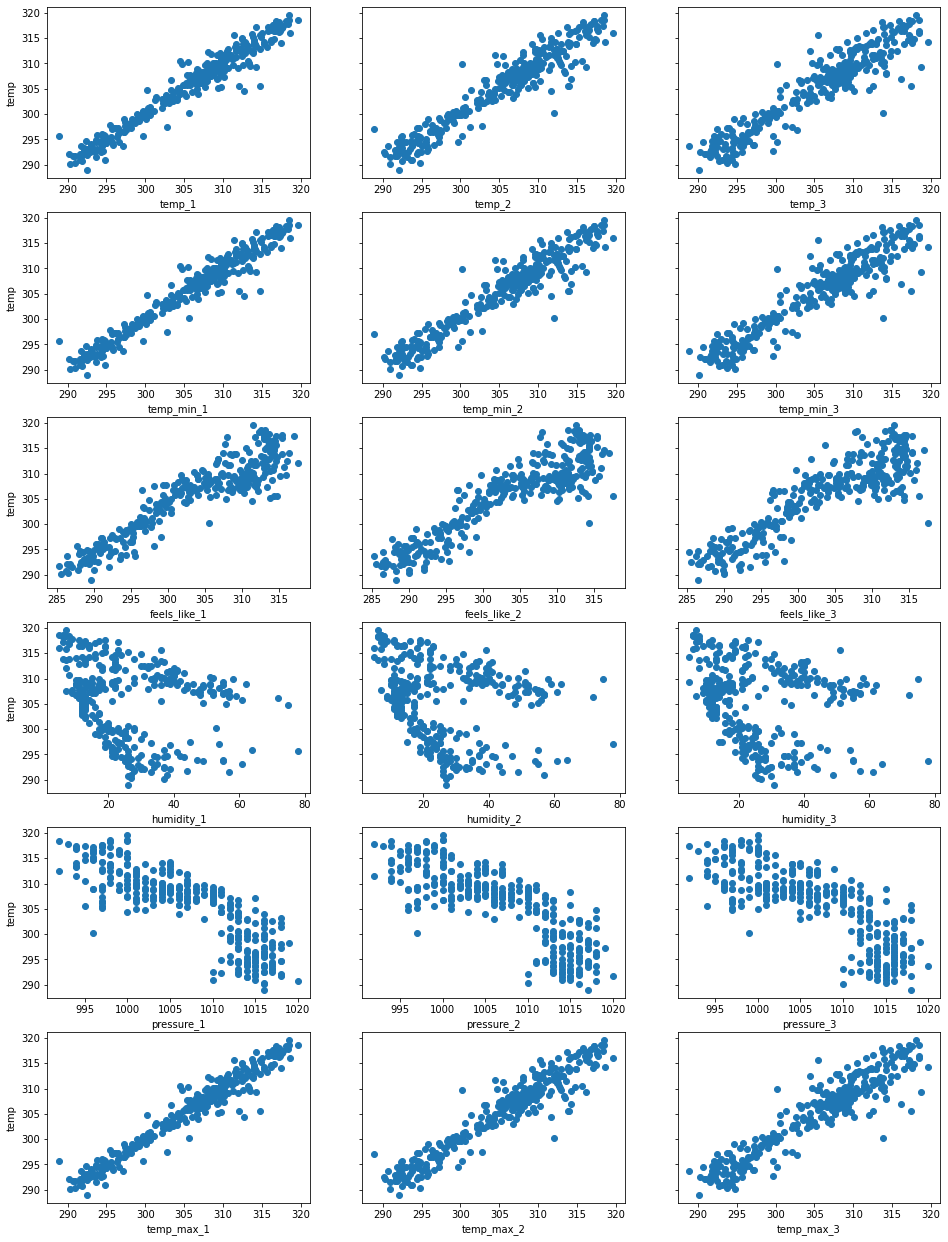

In [13]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()


In [14]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]
y = df2['temp']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)
X.iloc[:5, :5]

,const,temp_1,temp_2,temp_3,temp_min_1
date,,,,,
01-05-2020,1.0,313.37,312.80,313.54,313.37
02-05-2020,1.0,310.07,313.37,312.80,310.07
03-05-2020,1.0,308.49,310.07,313.37,308.49
04-05-2020,1.0,311.97,308.49,310.07,311.97
05-05-2020,1.0,309.17,311.97,308.49,309.17


In [15]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     488.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          9.50e-197
Time:                        23:29:57   Log-Likelihood:                -642.73
No. Observations:                 331   AIC:                             1311.
Df Residuals:                     318   BIC:                             1361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -51.7883     53.580     -0.967      0.334    -157.204      53.628
temp_1           0.3732      0.043      8.735      0.000       0.289       0.457
temp_2           0.0194      0.052      0.371      0.711      -0.084       0.122
temp_3          -0.0035      0.043     -0.081      0.936      -0.089       0.082
temp_min_1       0.3732      0.043      8.735      0.000       0.289       0.457
temp_min_2       0.0194      0.052      0.371      0.711      -0.084       0.122
temp_min_3      -0.0035      0.043     -0.081      0.936      -0.089       0.082
feels_like_1    -0.0887      0.085     -1.048      0.295      -0.255       0.078
feels_like_2    -0.0558      0.096     -0.583      0.560      -0.244       0.132
feels_like_3     0.0173      0.085      0.203      0.839      -0.150       0.184
humidity_1       0.0540      0.022      2.422      0.016       0.010       0.098
humidity_2      -0.0072      0.027     -0.268      0.789      -0.060       0.046
humidity_3      -0.0126      0.022     -0.569      0.570      -0.056       0.031
pressure_1       0.0590      0.062      0.959      0.338      -0.062       0.180
pressure_2       0.0272      0.083      0.330      0.742      -0.135       0.190
pressure_3      -0.0481      0.061     -0.783      0.434      -0.169       0.073
temp_max_1       0.3732      0.043      8.735      0.000       0.289       0.457
temp_max_2       0.0194      0.052      0.371      0.711      -0.084       0.122
temp_max_3      -0.0035      0.043     -0.081      0.936      -0.089       0.082
==============================================================================
Omnibus:                       80.144   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.257
Skew:                          -0.973   Prob(JB):                     1.43e-71
Kurtosis:                       7.458   Cond. No.                     1.57e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.6e-58. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that meandewptm_3 has the greatest p-value and that it is
#             greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('feels_like_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     534.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          4.10e-198
Time:                        23:30:04   Log-Likelihood:                -642.75
No. Observations:                 331   AIC:                             1310.
Df Residuals:                     319   BIC:                             1355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -52.6897     53.316     -0.988      0.324    -157.586      52.206
temp_1           0.3730      0.043      8.746      0.000       0.289       0.457
temp_2           0.0160      0.049      0.323      0.747      -0.081       0.113
temp_3           0.0032      0.028      0.116      0.908      -0.052       0.058
temp_min_1       0.3730      0.043      8.746      0.000       0.289       0.457
temp_min_2       0.0160      0.049      0.323      0.747      -0.081       0.113
temp_min_3       0.0032      0.028      0.116      0.908      -0.052       0.058
feels_like_1    -0.0878      0.084     -1.040      0.299      -0.254       0.078
feels_like_2    -0.0470      0.085     -0.552      0.582      -0.215       0.121
humidity_1       0.0541      0.022      2.430      0.016       0.010       0.098
humidity_2      -0.0077      0.027     -0.290      0.772      -0.060       0.045
humidity_3      -0.0108      0.020     -0.533      0.594      -0.051       0.029
pressure_1       0.0597      0.061      0.973      0.331      -0.061       0.180
pressure_2       0.0255      0.082      0.311      0.756      -0.136       0.187
pressure_3      -0.0467      0.061     -0.766      0.444      -0.167       0.073
temp_max_1       0.3730      0.043      8.746      0.000       0.289       0.457
temp_max_2       0.0160      0.049      0.323      0.747      -0.081       0.113
temp_max_3       0.0032      0.028      0.116      0.908      -0.052       0.058
==============================================================================
Omnibus:                       80.485   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.368
Skew:                          -0.979   Prob(JB):                     1.35e-71
Kurtosis:                       7.453   Cond. No.                     1.13e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     534.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          4.10e-198
Time:                        23:30:10   Log-Likelihood:                -642.75
No. Observations:                 331   AIC:                             1310.
Df Residuals:                     319   BIC:                             1355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -52.6897     53.316     -0.988      0.324    -157.586      52.206
temp_1           0.3730      0.043      8.746      0.000       0.289       0.457
temp_2           0.0160      0.049      0.323      0.747      -0.081       0.113
temp_3           0.0032      0.028      0.116      0.908      -0.052       0.058
temp_min_1       0.3730      0.043      8.746      0.000       0.289       0.457
temp_min_2       0.0160      0.049      0.323      0.747      -0.081       0.113
temp_min_3       0.0032      0.028      0.116      0.908      -0.052       0.058
feels_like_1    -0.0878      0.084     -1.040      0.299      -0.254       0.078
feels_like_2    -0.0470      0.085     -0.552      0.582      -0.215       0.121
humidity_1       0.0541      0.022      2.430      0.016       0.010       0.098
humidity_2      -0.0077      0.027     -0.290      0.772      -0.060       0.045
humidity_3      -0.0108      0.020     -0.533      0.594      -0.051       0.029
pressure_1       0.0597      0.061      0.973      0.331      -0.061       0.180
pressure_2       0.0255      0.082      0.311      0.756      -0.136       0.187
pressure_3      -0.0467      0.061     -0.766      0.444      -0.167       0.073
temp_max_1       0.3730      0.043      8.746      0.000       0.289       0.457
temp_max_2       0.0160      0.049      0.323      0.747      -0.081       0.113
temp_max_3       0.0032      0.028      0.116      0.908      -0.052       0.058
==============================================================================
Omnibus:                       80.485   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.368
Skew:                          -0.979   Prob(JB):                     1.35e-71
Kurtosis:                       7.453   Cond. No.                     1.13e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

In [22]:
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
prediction = regressor.predict(X_test)
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degress celcius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celcius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.96
The Mean Absolute Error: 1.06 degress celcius
The Median Absolute Error: 0.80 degrees celcius


In [23]:
days = ['Tomorrow', 'Day after tomorrow', 'The next day', 'The next day1', 'The next day2']
predic = prediction
predic_dic = {days[i]: predic[i] for i in range(0, 5)}
print(predic_dic)
# w= median_absolute_error(y_test, prediction)
from flask import Flask, redirect, url_for,render_template,request


app = Flask(__name__)


@app.route("/")
def home():
    return render_template("proj.html", temp=predic_dic, a=regressor.score(X_test, y_test))


# @app.route("/login", methods=["POST","GET"])
# def home():
#     return render_template("login.html", content=predictors)

if __name__ == '__main__':
    app.run(debug=True)
    %tb

{'Tomorrow': 310.45248033815574, 'Day after tomorrow': 295.1223562367944, 'The next day': 293.21285615116955, 'The next day1': 310.11387049747225, 'The next day2': 291.11866396190993}
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Restarting with stat


SystemExit: 2